<a href="https://colab.research.google.com/github/wjng-3393/Training-ground/blob/main/dimension_reduction_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler #used to standardize data to ensure no bias
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans #algorithm
from sklearn.metrics import silhouette_score #accuracy score but for cluster
iris=load_iris()
X=iris.data

feature_names = iris.feature_names
target_names = iris.target_names
import pandas as pd
df=pd.DataFrame(X,columns=feature_names)

scalar = StandardScaler()
df_scale = scalar.fit_transform(df)
df_scale

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
pca=PCA(n_components=2, random_state=42)
X_pca=pca.fit_transform(df_scale)
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
pca.explained_variance_ratio_.sum().round(3) #96% of data is retained

np.float64(0.958)

In [ ]:
k = 3

kmeans_pca = KMeans(n_clusters=k,random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

In [ ]:
centroids_pca = kmeans_pca.cluster_centers_

Text(0.5, 1.0, 'KMeans Clustering on PCA-Reduced Iris (k=3)')

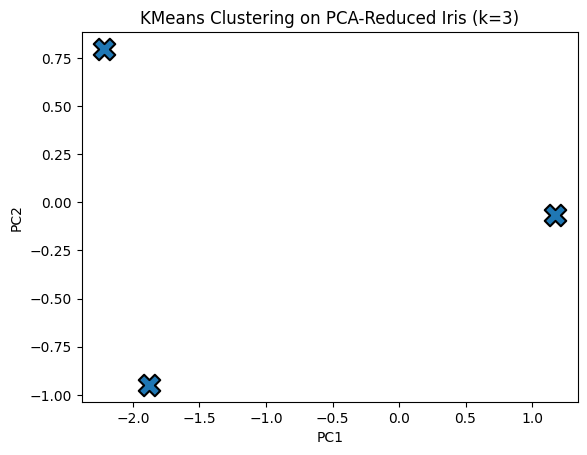

In [ ]:
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=240, edgecolors='black', linewidths=1.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering on PCA-Reduced Iris (k=3)")

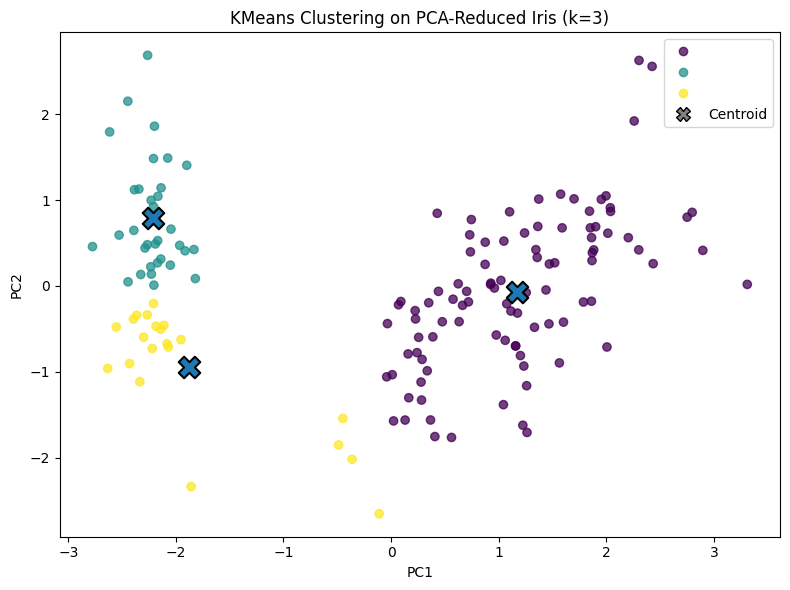

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, alpha=0.75)

# Plot centroids (big X markers)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=240, edgecolors='black', linewidths=1.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering on PCA-Reduced Iris (k=3)")

# Legend: clusters + centroids
handles, _ = scatter.legend_elements(prop="colors", alpha=0.75, fmt="Cluster {x}")
centroid_handle = plt.Line2D([0], [0], marker='X', color='w',
                             markerfacecolor='gray', markeredgecolor='black',
                             markersize=10, linestyle='None', label='Centroid')
plt.legend(handles + [centroid_handle], [h.get_label() for h in handles] + ['Centroid'])
plt.tight_layout()
plt.show()

In [ ]:
#evaluate clustering using silhouette score
from sklearn.metrics import silhouette_score

In [ ]:
sil_score = silhouette_score(X_pca, labels_pca)
print("Silhouette Score:", sil_score.round(3))

Silhouette Score: 0.523


In [ ]:
scores={}
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(X_pca)
    scores[k]=silhouette_score(X_pca,labels)
    print(f"k={k}, silhouette={scores[k].round(3)}")



k=2, silhouette=0.615
k=3, silhouette=0.523
k=4, silhouette=0.445
k=5, silhouette=0.411
k=6, silhouette=0.362
k=7, silhouette=0.355
k=8, silhouette=0.419
k=9, silhouette=0.442
k=10, silhouette=0.441


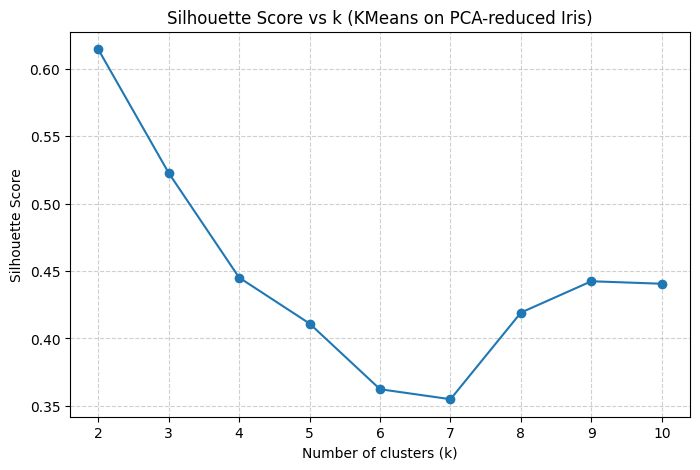

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(list(scores.keys()), list(scores.values()), marker="o")
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k (KMeans on PCA-reduced Iris)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
